In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import (LabelEncoder, StandardScaler)
from sklearn.metrics import(confusion_matrix,ConfusionMatrixDisplay, classification_report)
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss



In [25]:
telco_csv = pd.read_csv("./data_telco_customer_churn.csv", sep=',')

In [26]:
telco_df = pd.DataFrame(telco_csv)

In [27]:
encoder = LabelEncoder()

dependent_encoded =encoder.fit_transform(telco_df['Dependents'])
onlineSec_encoded =encoder.fit_transform(telco_df['OnlineSecurity'])
onlineBack_encoded =encoder.fit_transform(telco_df['OnlineBackup'])
internetServ_encoded = encoder.fit_transform(telco_df['InternetService'])
deviceProc_encoded = encoder.fit_transform(telco_df['DeviceProtection'])
tech_encoded = encoder.fit_transform(telco_df['TechSupport'])
contract_encoded = encoder.fit_transform(telco_df['Contract'])
paperless_encoded = encoder.fit_transform(telco_df['PaperlessBilling'])
churn_encoded = encoder.fit_transform(telco_df['Churn'])

In [28]:
telco_df['Dependents'] = dependent_encoded
telco_df['Contract'] = contract_encoded
telco_df['DeviceProtection'] = deviceProc_encoded
telco_df['InternetService'] = internetServ_encoded
telco_df['OnlineBackup'] = onlineBack_encoded
telco_df['OnlineSecurity'] = onlineSec_encoded
telco_df['PaperlessBilling'] = paperless_encoded
telco_df['TechSupport'] = tech_encoded
telco_df['Churn'] = churn_encoded


In [29]:
scaler = StandardScaler()
tenure_scaled =scaler.fit_transform(pd.DataFrame(telco_df['tenure']))
monthly_scaled =scaler.fit_transform(pd.DataFrame(telco_df['MonthlyCharges']))


telco_df['tenure'] = tenure_scaled
telco_df['MonthlyCharges'] = monthly_scaled

In [30]:
telco_data = telco_df[['Dependents', 'tenure', 'OnlineSecurity', 'OnlineBackup', 'InternetService',	'DeviceProtection',	'TechSupport', 'Contract', 'PaperlessBilling', 'MonthlyCharges']]
telco_target = telco_df[['Churn']]

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(telco_data, telco_target, train_size=0.8, test_size=0.2, random_state=39)

print(Y_train.shape[0])

3944


In [32]:
#Logistic Regression
Y_train_reshaped = np.reshape(Y_train, Y_train.shape[0])
lr = LogisticRegression()

lr_model = lr.fit(X_train, Y_train_reshaped)

Y_pred = lr.predict(X_test)

In [33]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       732
           1       0.61      0.53      0.57       254

    accuracy                           0.79       986
   macro avg       0.73      0.71      0.71       986
weighted avg       0.78      0.79      0.79       986



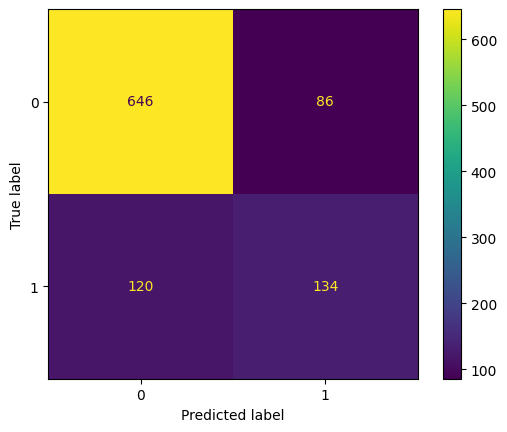

In [34]:
confuse_mat = confusion_matrix(Y_test, Y_pred)
confuse_matDisp = ConfusionMatrixDisplay(confuse_mat)
confuse_matDisp.plot()

Over-Under Sampling<br>
No need to run the below codes as they do not yield to the better F1-Score in the current parameter setting

In [11]:
smote = SMOTE(sampling_strategy=0.7, random_state=39)
X_train_oversampled, Y_train_oversampled = smote.fit_resample(X_train, Y_train)

In [12]:
Y_train_oversampled_reshaped = np.reshape(Y_train_oversampled, Y_train_oversampled.shape[0])

lr_model_over_boosted = LogisticRegression(class_weight='balanced', random_state=39)


over_boosted_model = lr_model_over_boosted.fit(X_train_oversampled, Y_train_oversampled_reshaped)

Y_pred_over_boosted = over_boosted_model.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_pred_over_boosted))

In [14]:
undersample = NearMiss(version=1)
X_train_undersampled, Y_train_undersampled = undersample.fit_resample(X_train, Y_train)

In [15]:
lr_under_boosted = LogisticRegression(class_weight='balanced', random_state=39)
Y_train_undersampled_reshaped = np.reshape(Y_train_undersampled, Y_train_undersampled.shape[0])

under_boosted_model = lr_under_boosted.fit(X_train_undersampled, Y_train_undersampled_reshaped)

Y_pred_under_boosted = under_boosted_model.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_pred_under_boosted))

In [17]:
undersample = NearMiss(version=1)
X_train_overundersampled, Y_train_overundersampled = undersample.fit_resample(X_train_oversampled, Y_train_oversampled)

In [18]:
lr_overunder_boosted = LogisticRegression(class_weight='balanced', random_state=39)
Y_train_overundersampled_reshaped = np.reshape(Y_train_overundersampled, Y_train_overundersampled.shape[0])

overunder_boosted_model = lr_overunder_boosted.fit(X_train_overundersampled, Y_train_overundersampled_reshaped)

Y_pred_overunder_boosted = overunder_boosted_model.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_pred_overunder_boosted))

In [20]:
undersample = NearMiss(version=1)
X_train_undersampled, Y_train_undersampled = undersample.fit_resample(X_train, Y_train)

In [21]:
smote = SMOTE(sampling_strategy='minority', random_state=39)
X_train_underoversampled, Y_train_underoversampled = smote.fit_resample(X_train_undersampled, Y_train_undersampled)

In [22]:
Y_train_underoversampled_reshaped = np.reshape(Y_train_underoversampled, Y_train_underoversampled.shape[0])

lr_underover_boosted = LogisticRegression(class_weight='balanced', random_state=39)


underover_boosted_model = lr_underover_boosted.fit(X_train_underoversampled, Y_train_underoversampled_reshaped)

Y_pred_underover_boosted = underover_boosted_model.predict(X_test)

In [ ]:
print(classification_report(Y_test, Y_pred_underover_boosted))